In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pandas import Series, DataFrame
import pandas as pd
plt.rc('figure', figsize=(10, 6))
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# <font color='blue'>Question 1 [7 points] - Cleaning the scraped Nobel Prize dataset</font>

The first part of this assignment consists of finding and eliminating dirty data in the Nobel Prize dataset scraped from Wikipedia (https://en.wikipedia.org/wiki/List_of_Nobel_laureates). The final aim is to have a cleaned dataset that is ready to be explored by EDA.
The following points should be considered:

1. The first Nobel was awarded in 1901  
2. Replace empty strings, i.e. <tt>''</tt>, with <tt>NaN</tt>  
3. Some names are marked with an asterisk, denoting that these winners are recorded by country of birth, not country at the time of winning the prize. Clean up those names by removing the asterisks and strip any remaining whitespace. Generate a flag variable that equals 1 if the country is the country of birth  
4. Some names are duplicated. This could indicate that some people have won the Nobel Prize more than once. However, it could also be that a winner is "claimed" by more than one country. Remove all real duplicates. For instance, Marie Curie is contained 4 times: twice for Poland and twice for France. Remove 2 of them (you have to make a choice here: remove winners by country alphabetically or not?)  
5. Consider the missing values in the field <font color='blue'>category</font>. Are they really missing or just entry mistakes? [You don't have to complete missing values]  
6. Is there an explanation of the missing values of the field <font color='blue'>gender</font>? Remove all rows without gender  
7. What about missing values for <font color='blue'>date_of_birth</font>?  
8. Convert the <font color='blue'>date_of_birth</font> into a Numpy <tt>datetime64</tt> object. You may replace incorrect dates, e.g. 'None', by <tt>NaN</tt>. Determine the winners' ages by subtracting the prize <font color='blue'>year</font> from <font color='blue'>date_of_birth</font> and make a histogram of these ages.

Note: all changes should be made within this notebook. So, *no* alterations may be made to the input file outside this notebook (e.g. by using a file editor). When you have a choice, please <font color='red'>motivate</font>. *Show that you are aware of the consequences of your decision* (sometimes there is no right/wrong).

In [3]:
df=pd.read_json(open('nobel_winners.json'))

1. Filter rows for which a prize which "awarded" before 1901 - the rows with the year 1809 were filtered

In [4]:
df_1901 = df[df['year']>=1901]



In [5]:
for i in df.columns:
    if df[i].isna().sum() > 0: print(i + " " + str(df[i].isna().sum()))

date_of_birth 8
date_of_death 8
gender 12
place_of_birth 8
place_of_death 8


2. values are converted to NaN - considerable amount of NaNs observed

In [6]:
df2 = df_1901.replace(r'^\s*$', np.nan, regex=True)
df2 = df2.fillna(np.nan)

for i in df2.columns:
    if df2[i].isna().sum() > 0: print(i + " " + str(df2[i].isna().sum()))

born_in 907
category 6
country 142
date_of_birth 9
date_of_death 370
gender 11
place_of_birth 37
place_of_death 417


3. using rstrip, we remove the space and the asteriks from the right side of the string

In [14]:
df2['name'] = df2['name'].str.replace("*",'').str.replace(" ",'')
for i in df2.name:
    print(i)

df2['flag_birth_country'] = df2.born_in.notnull()

CésarMilstein
IvoAndric
VladimirPrelog
InstitutdeDroitInternational
AugusteBeernaert
MauriceMaeterlinck
HenriLaFontaine
JulesBordet
CorneilleHeymans
GeorgesPire
AlbertClaude
ChristiandeDuve
IlyaPrigogine
FrançoisEnglert
SimonKuznets
MenachemBegin
ShimonPeres
KarlAdolphGjellerup
AugustKrogh
NielsBohr
JohannesAndreasGribFibiger
HenrikDam
JohannesVilhelmJensen
BenRoyMottelson
AageBohr
NielsKajJerne
JensChristianSkou
BerthavonSuttner
GertyCori
CarlFerdinandCori
JaroslavHeyrovský
JaroslavSeifert
ChristopherA.Pissarides
IrèneJoliot-Curie
FrédéricJoliot
RogerMartinduGard
AndréGide
LéonJouhaux
AlbertSchweitzer
FrançoisMauriac
AndréFrédéricCournand
AlbertCamus
Saint-JohnPerse
Jean-PaulSartre
AndréLwoff
JacquesMonod
FrançoisJacob
AlfredKastler
RenéCassin
ErnstOttoFischer
HenryKissinger
ArnoPenzias
GeorgWittig
GeorgesJ.F.Köhler
KlausvonKlitzing
GerdBinnig
ErnstRuska
J.GeorgBednorz
JackSteinberger
HartmutMichel
RobertHuber
JohannDeisenhofer
WolfgangPaul
HansG.Dehmelt
ErwinNeher
OdysseasElytis
Kofi

4.

In [15]:
df2['id_unique'] = df2['link'] + df2['year'].astype(str)

df3 = df2.drop_duplicates(subset=['id_unique'])

5. Entry mistakes (e.g. as can be read from the text column Economic Sciences vs. Economics) - when checking the wikipedia these people actually won an Nobel prize.

6. An institutions (e.g. Institut de Droit International) can't have a gender

In [8]:
df6 = df3[df3.gender.notnull()]
df6


,born_in,category,country,date_of_birth,date_of_death,gender,link,name,place_of_birth,place_of_death,text,year
0,NaN,Physiology or Medicine,Argentina,8 October 1927,24 March 2002,male,http://en.wikipedia.org/wiki/C%C3%A9sar_Milstein,César Milstein,"Bahía Blanca , Argentina","Cambridge , England","César Milstein , Physiology or Medicine, 1984",1984
1,Bosnia and Herzegovina,Literature,NaN,9 October 1892,13 March 1975,male,http://en.wikipedia.org/wiki/Ivo_Andric,Ivo Andric,"Dolac (village near Travnik), Austria-Hungary ...","Belgrade, SR Serbia, SFR Yugoslavia (present-d...","Ivo Andric *, born in then Austria–Hungary ,...",1961
2,Bosnia and Herzegovina,Chemistry,NaN,"July 23, 1906",1998-01-07,male,http://en.wikipedia.org/wiki/Vladimir_Prelog,Vladimir Prelog,"Sarajevo , Bosnia and Herzegovina , then part...","Zürich , Switzerland","Vladimir Prelog *, born in then Austria–Hung...",1975
4,NaN,Peace,Belgium,26 July 1829,6 October 1912,male,http://en.wikipedia.org/wiki/Auguste_Marie_Fra...,Auguste Beernaert,"Ostend , Netherlands (now Belgium )","Lucerne , Switzerland","Auguste Beernaert , Peace, 1909",1909
5,NaN,Literature,Belgium,29 August 1862,6 May 1949,male,http://en.wikipedia.org/wiki/Maurice_Maeterlinck,Maurice Maeterlinck,"Ghent , Belgium","Nice , France","Maurice Maeterlinck , Literature, 1911",1911
...,...,...,...,...,...,...,...,...,...,...,...,...
1047,NaN,Physics,Australia,"February 24, 1967",NaN,male,http://en.wikipedia.org/wiki/Brian_P._Schmidt,Brian P. Schmidt,"Missoula, Montana",NaN,"Brian P. Schmidt , born in the United States ...",2011
1048,NaN,Peace,Argentina,"November 1, 1878","May 5, 1959",male,http://en.wikipedia.org/wiki/Carlos_Saavedra_L...,Carlos Saavedra Lamas,"Buenos Aires , Argentina","Buenos Aires, Argentina","Carlos Saavedra Lamas , Peace, 1936",1936
1049,NaN,Physiology or Medicine,Argentina,1887-04-10,1971-09-21,male,http://en.wikipedia.org/wiki/Bernardo_Houssay,Bernardo Houssay,"Buenos Aires , Argentina","Buenos Aires , Argentina","Bernardo Houssay , Physiology or Medicine, 1947",1947
1050,NaN,Chemistry,Argentina,1906-9-6,1987-12-2,male,http://en.wikipedia.org/wiki/Luis_Federico_Leloir,Luis Federico Leloir,"Paris , France","Buenos Aires , Argentina","Luis Federico Leloir , Chemistry, 1970",1970


7. Same argumentation as for 6. --> e.g. Amnesty International does not have a birth date

8. Convert the date_of_birth into a Numpy datetime64 object. You may replace incorrect dates, e.g. 'None', by NaN. Determine the winners' ages by subtracting the prize year from date_of_birth and make a histogram of these ages.

<ipython-input-9-68d0f45626c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['birthyear'] = pd.DatetimeIndex(date).year
<ipython-input-9-68d0f45626c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['age'] = df6.year - df6.birthyear


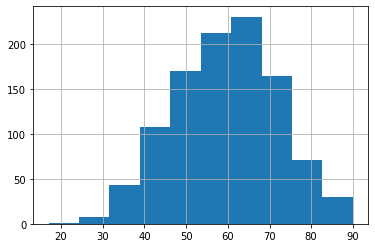

In [9]:
date = pd.to_datetime(df6.date_of_birth, errors='coerce')
df6['birthyear'] = pd.DatetimeIndex(date).year
df6['age'] = df6.year - df6.birthyear
df6.age.hist()

# <font color='blue'>Question 2 [3 points] - Decathlon World all-time list</font>

In the file <tt>DecathlonWorldAll-TimeList.csv</tt> you can find the information from the site [http://www.decathlon2000.com/834/decathlon-world-all-time-list]. It contains the total score, column <font color='blue'>Pts</font>, of all-time Decathlon finalists. This total score is based on the following 10 components: 100 m (in Seconds), Long jump (Metres), Shot put (Metres), High jump (Metres), 400 m (Seconds), 110 m hurdles (Seconds), Discus throw (Metres), Pole vault (Metres), Javelin throw (Metres), 1500 m (Minutes:Seconds).
- (a) preprocess the dataframe <tt>df1</tt>:
 - convert <font color='blue'>100m</font>, <font color='blue'>400m</font>, <font color='blue'>110mHurdles</font> into floats.
 - convert <font color='blue'>1500m</font> in seconds, so 4.17,52 equals 4*60+17.52=257.52 seconds.
- (b) Apply PCA to the 10 components after standardizing. Determine how many components to use based on (motivate you answers):
 - Eigenvalue Criterion
 - Proportion of Variance Explained Criterion (use a minimum of 95% variability)
 - Scree Plot Criterion
 
Note: use all data (so don't split it into a training and test set)

In [16]:
from sklearn.decomposition import PCA


df1=pd.read_csv('DecathlonWorldAll-TimeList.csv')

new = df1['1500m'].str.split('.', expand=True)
x = pd.DataFrame(new)
x[1] = x[1].str.replace(',', '.')
x=x.astype('float')
df1['1500m_corrected'] = x[0]*60 + x [1]
df1['100m'] = pd.to_numeric(df1['100m'].apply(lambda x: x.replace(',','.')))
df1['400m'] = pd.to_numeric(df1['400m'].apply(lambda x: x.replace(',','.')))
df1['110mHurdles'] = pd.to_numeric(df1['110mHurdles'].apply(lambda x: x.replace(',','.')))
df1.dtypes


Nr                   int64
Decathlete          object
Nat                 object
Pts                  int64
100m               float64
LongJump           float64
ShotPut            float64
HighJump           float64
400m               float64
110mHurdles        float64
DiscusThrow        float64
PoleVault          float64
JavelinThrow       float64
1500m               object
Venue               object
Unnamed: 15         object
1500m_corrected    float64
dtype: object

In [29]:
from scipy.stats import zscore
df1_norm = df1.iloc[:, [4,5,6,7,8,9,10,11,12,16]].apply(zscore,ddof=1)
df1_norm


,100m,LongJump,ShotPut,HighJump,400m,110mHurdles,DiscusThrow,PoleVault,JavelinThrow,1500m_corrected
0,-2.703435,1.368167,-0.690095,-0.613429,-3.343878,-1.767087,-0.976730,1.043691,0.032633,-1.303612
1,-0.869260,2.299482,0.278137,1.046510,-0.657802,-1.174427,0.530092,-0.457320,1.287931,-0.896987
2,-1.316620,1.449151,2.011393,-0.160718,-0.378604,-1.664016,0.664982,-0.082067,1.703160,0.490644
3,-1.808715,2.178006,1.903812,0.291992,0.035379,-1.019820,0.740652,0.293185,-0.169214,0.937384
4,-1.763979,1.894562,0.744323,-0.311622,-1.447258,-0.117945,0.082651,0.293185,0.342132,0.290066
...,...,...,...,...,...,...,...,...,...,...
118,0.517555,-1.911681,-1.192142,-0.764333,0.006497,-0.014874,-0.312149,1.981823,-0.561375,0.648371
119,1.814898,-1.587745,0.110788,-0.311622,1.142543,1.350821,1.270342,-0.457320,1.086084,0.073078
120,0.025459,0.193900,-2.100607,1.197414,-0.214936,-0.452927,-0.762879,0.668438,-0.867029,2.172759
121,0.875443,0.355868,0.015161,1.650125,-0.041641,0.964304,-0.108169,-1.958332,-0.015426,1.024909


In [30]:
from sklearn.decomposition import PCA
pca = PCA(10).fit(df1_norm)
print(pca.explained_variance_.round(3))


[2.172 1.842 1.448 1.107 0.972 0.671 0.64  0.473 0.413 0.263]


In [32]:
eigenValues, eigenVectors = np.linalg.eig(df1_norm.cov())
idx = np.argsort(eigenValues)[::-1]
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
print(eigenValues.round(3))


[2.172 1.842 1.448 1.107 0.972 0.671 0.64  0.473 0.413 0.263]


In [38]:
pca_scores = PCA().fit_transform(df1_norm)
pca_scr=DataFrame(pca_scores,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9', 'PC10'])
results=DataFrame({'Component':np.arange(pca.n_components)+1,
'Total':pca.explained_variance_.round(4),
'% of Variance':100*pca.explained_variance_ratio_.round(5),
'Cumulative%':100*np.cumsum(pca.explained_variance_ratio_).round(5),
'Var. PCA scores':pca_scr.var()})
results



,Component,Total,% of Variance,Cumulative%,Var. PCA scores
PC1,1,2.1718,21.718,21.718,2.171818
PC2,2,1.8419,18.419,40.137,1.841913
PC3,3,1.4475,14.475,54.613,1.447533
PC4,4,1.1072,11.072,65.684,1.107175
PC5,5,0.9719,9.719,75.403,0.971898
PC6,6,0.6714,6.714,82.117,0.671361
PC7,7,0.6400,6.400,88.517,0.639983
PC8,8,0.4730,4.730,93.247,0.473038
PC9,9,0.4125,4.125,97.373,0.412533
PC10,10,0.2627,2.627,100.000,0.262748


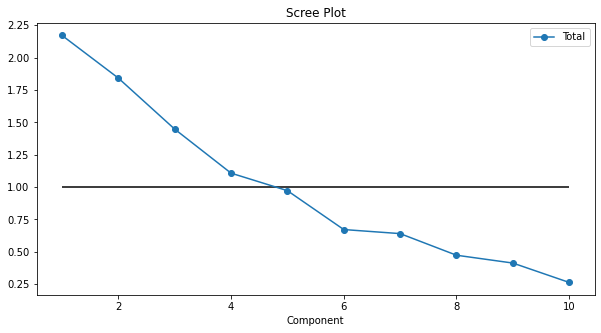

In [39]:
results.plot(x='Component', y='Total',marker='o',title='Scree Plot',figsize=(10,5))
plt.hlines(1,1,pca.n_components);
plt.show()
